<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №2. Жесткие и мягкие модели по Арнольду.**
###Бифуркации динамических систем на прямой и плоскости. Бифуркационная диаграмма.

**Бифуркация** - возможное качественное скачкообразное
изменение в исследуемой динамической системе при изменении параметров.

После прохождения точки $ε=0$ поведение динамической системы становится совершенно другим. Нулевое значение параметра ε называют бифуркационным.
Прохождение точки бифуркации, $ε = 0$, сопровождается ситуацией, в 
которой система скачком изменяет свое поведение. 

Иными словами, бифуркационным (критическим) значением параметра называется такое его значение, при котором динамическая система становится негрубой (структурно-неустойчивой).

**Предельный цикл** - изолированная замкнутая траектория в фазовом пространстве динамической системы, изображающая периодическое движение.

Предельные циклы могут быть устойчивыми (когда притягивают к 
себе траектории снаружи и изнутри), неустойчивыми (отталкивают от себя 
траектории снаружи и изнутри) и полуустойчивыми (притягивают траектории 
снаружи и отталкивают изнутри, либо наоборот).

**Автоколебания** - незатухающие колебания. 


In [2]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt 
import math


colors = ["#00FFFF",                
          "#0000FF",                
          "#FF0000",                
          "#00FF00",                
          "#D2691E",                
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                
          "#A52A2A",                
          "#7B68EE",                
          "#4682B4",                
          "#800000"                
          ]
          
colors.extend(colors)

# функция отрисовки линии по наклону и пересечению
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, c = "black")
    
# Функция составления сетки из представленных дискретных значений в списках
def mesh(x, y):
    general = []
    for i in range(len(x)):
        for j in range(len(y)):
            local = []
            local.append(x[i])
            local.append(y[j])
            general.append(local)
    return general

stat_dpi = 120
rect_pics = (7, 7)
dynamics_pics = (14, 7)

###1.
$\overset{\cdot}{x}=- ε ^2 sin(x)$

Точки равновесия:    
$x=πk, k∈Z$​

1. $\ k=0$
* если $ε > 0$, то экспонента убывает и система устойчивая;
* если $ε < 0$, то экспонента возрастает и система неустойчивая.

2. $\ k=1$
* если $ε > 0$, то экспонента возрастает и система неустойчивая;
* если $ε < 0$, то экспонента убывает и система устойчивая​.

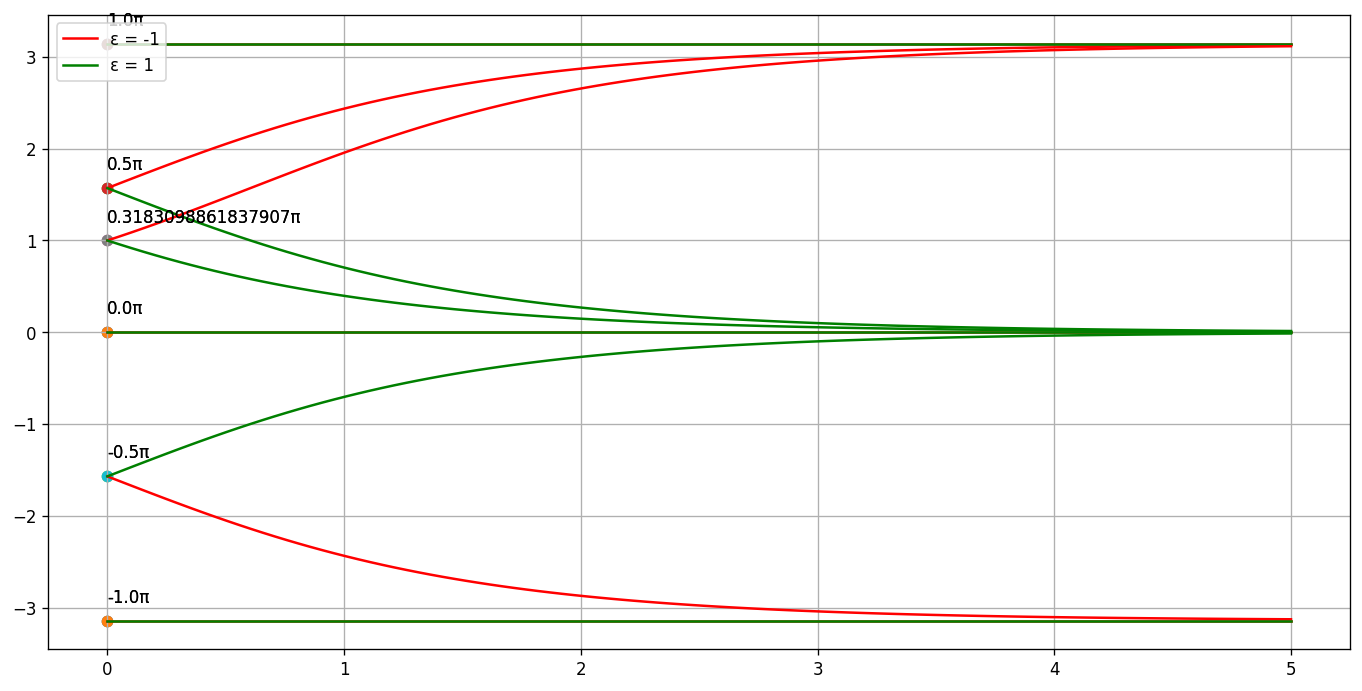

In [ ]:
def f(y, t, epsilon = 1):
    return [-epsilon * math.sin(y)]

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

epsilon = [-1, 1]
local_colors = ['r', 'g']
time = np.linspace(0, 5, 100) 
grid = mesh([0, 0.5 * math.pi, math.pi, 1, - 0.5 * math.pi, -math.pi], epsilon)

for i in grid:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y = w[:, 0]

    plt.plot(time, y, c=local_colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])
    plt.text(0, i[0] + 0.2, f'{i[0] / math.pi}π')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
    
plt.grid(True)  
plt.show() 

Тип бифуркаци:
вилка

###2.
$\cfrac{dx}{dt} =ε-x^2$

Точки равновесия: 

$x =±ε$
​


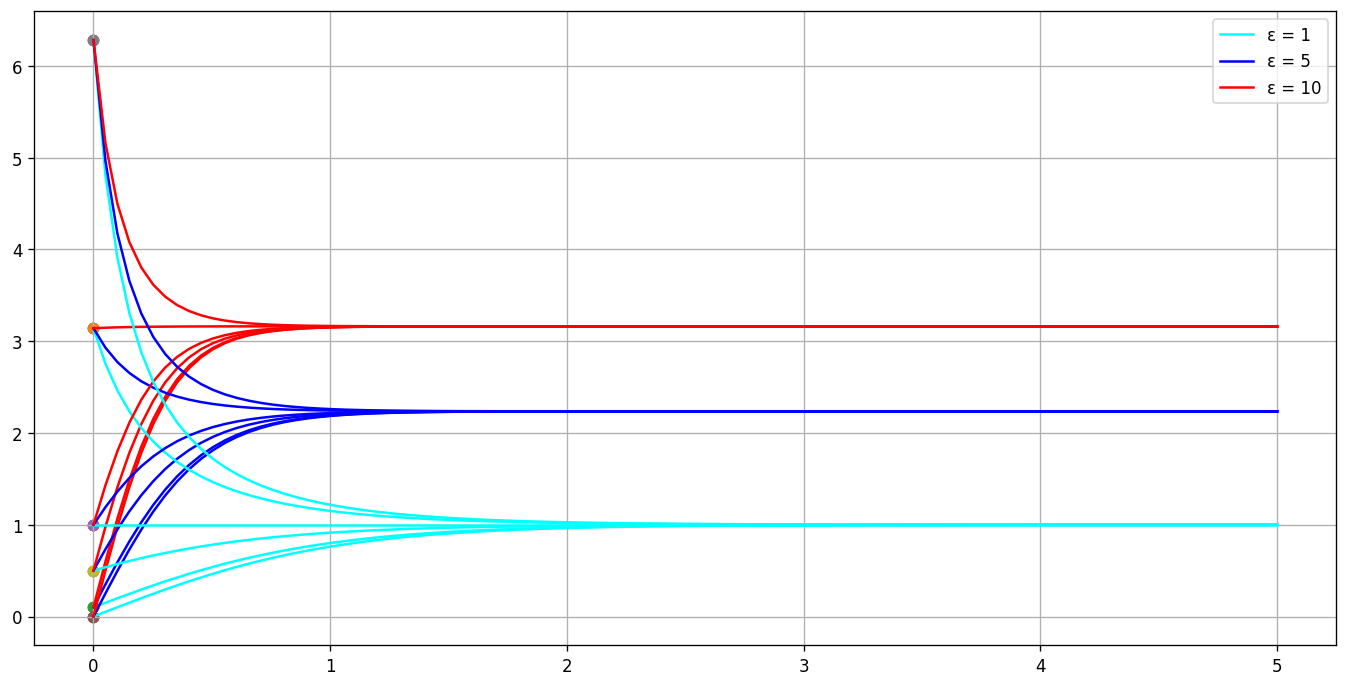

In [ ]:
def f(y, t, epsilon = 1):
    y1 = epsilon - y ** 2
    return (y1[0])

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

epsilon = [1, 5, 10]
time = np.linspace(0, 5, 100)
grid = mesh([0.1, 0, 0.5, math.pi, 1, 2 * math.pi], epsilon)

for i in grid:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y = w[:, 0]
    plt.plot(time, y, c=colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])
    # plt.text(0, i[0], f'{i[0] / math.pi}π')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
    
plt.grid(True)  
plt.show() 

Тип бифуркаци:
вилка

###3.
$\cfrac{dx}{dt} =ε^2-x^2$

Точки равновесия: 
$x=0; \ x=ε$​

1. $x=0$:

* если $ε > 0$, то экспонента возрастающая и система неустойчивая;
* если $ε < 0$, то экспонента убывающая и система устойчивая.

2. $x=ε$
* если $ε > 0$, то экспонента убывающая и система устойчивая;
* если $ε < 0$, то экспонента возрастающая и система неустойчивая.

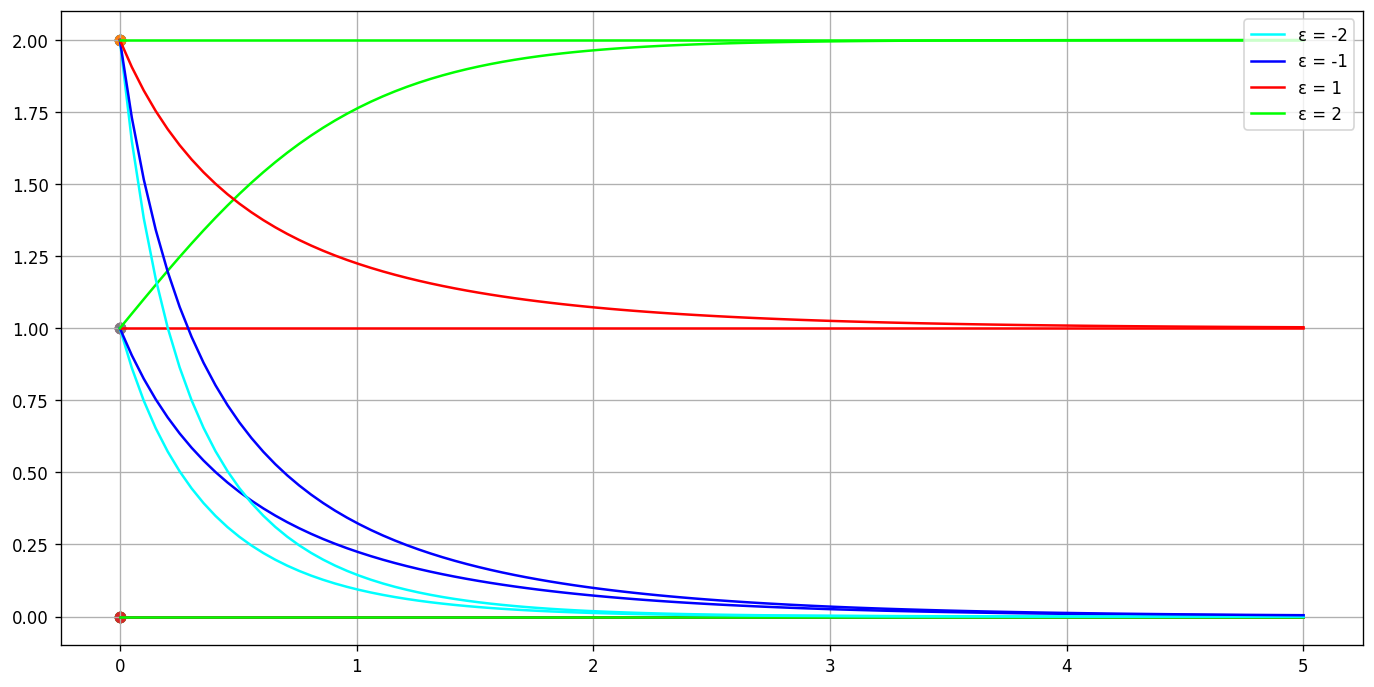

In [ ]:
def f(y, t, epsilon = 1):
    y1 = epsilon * y - y ** 2
    return (y1[0])
    
fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

epsilon = [-2, -1, 1, 2]
grid = mesh([0, 1, 2], epsilon)
time = np.linspace(0, 5, 100)

for i in grid:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y = w[:, 0]
    plt.plot(time, y, c=colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
    
plt.grid(True)  
plt.show() 

Тип бифуркаци:
вилка

###4.
$\cfrac{dx}{dt} =εx-x^3$

Точки равновесия: 

$
\left\{
\begin{array}{cc}
x=0 \\
x=±\sqrt{ε}
\end{array}
\right.
$

1. $x=0$

* если $ε > 0$, то система неустойчивая;
* если $ε < 0$, то система устойчивая.

2. $x = \sqrt{ε}$
* система устойчива при $ε > 0$.
3. $x = -\sqrt{ε}$
* система устойчива при $ε > 0$.
​​

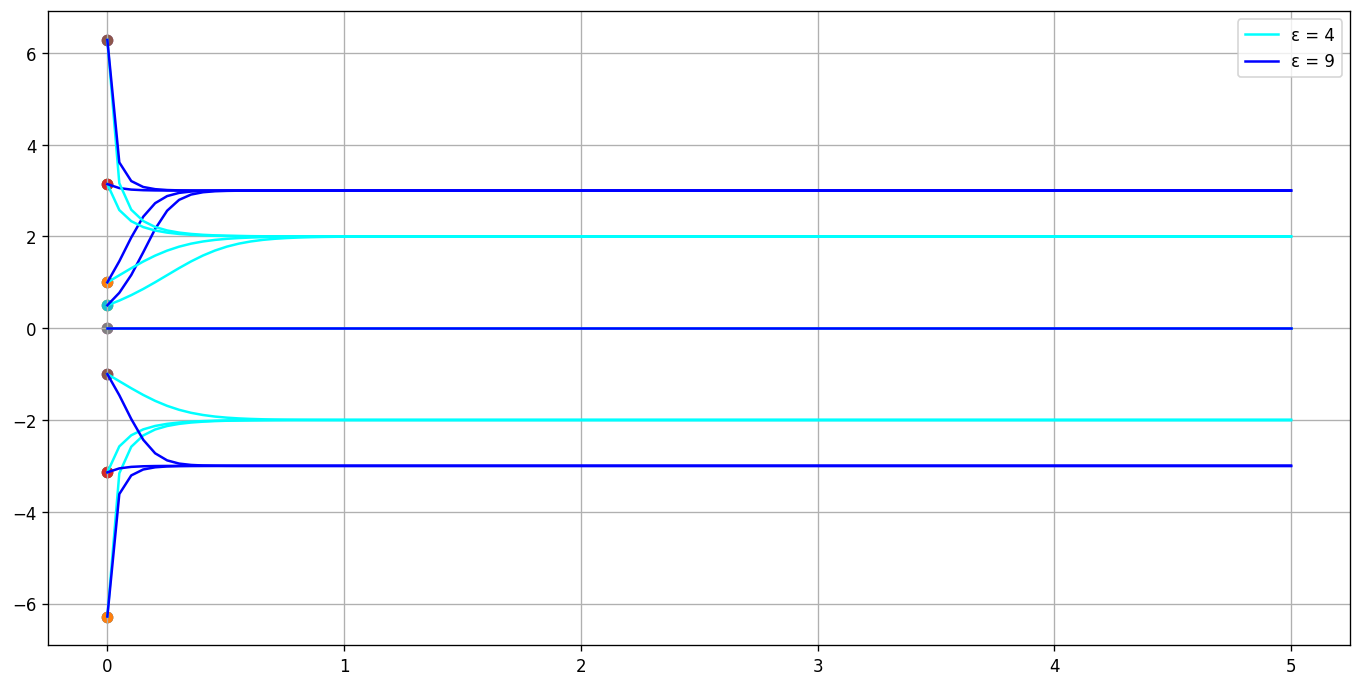

In [ ]:
def f(y, t, epsilon = 1):
    y1 = epsilon * y - y ** 3
    return (y1[0])

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

epsilon = [4, 9]
grid = mesh([-2 * math.pi, -math.pi, -1, 0, 0.5, 1, math.pi, 2 * math.pi], epsilon)
time = np.linspace(0, 5, 100)

for i in grid:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y = w[:, 0]
    plt.plot(time, y, c=colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
    
plt.grid(True)  
plt.show() 

Тип бифуркаци:
вилка

###5.
$\overset{\cdot \cdot}{x}=-\frac{\partial{U}}{\partial{x}} = f(x,ε) \\ 
f(x,ε) = -4x^3 - 2 εx$

Собственные значения: 

$
\left\{
\begin{array}{cc}
λ=±− \sqrt{2ε} \\
​λ=± \ i\sqrt{2ε}
​\end{array}
\right.
$

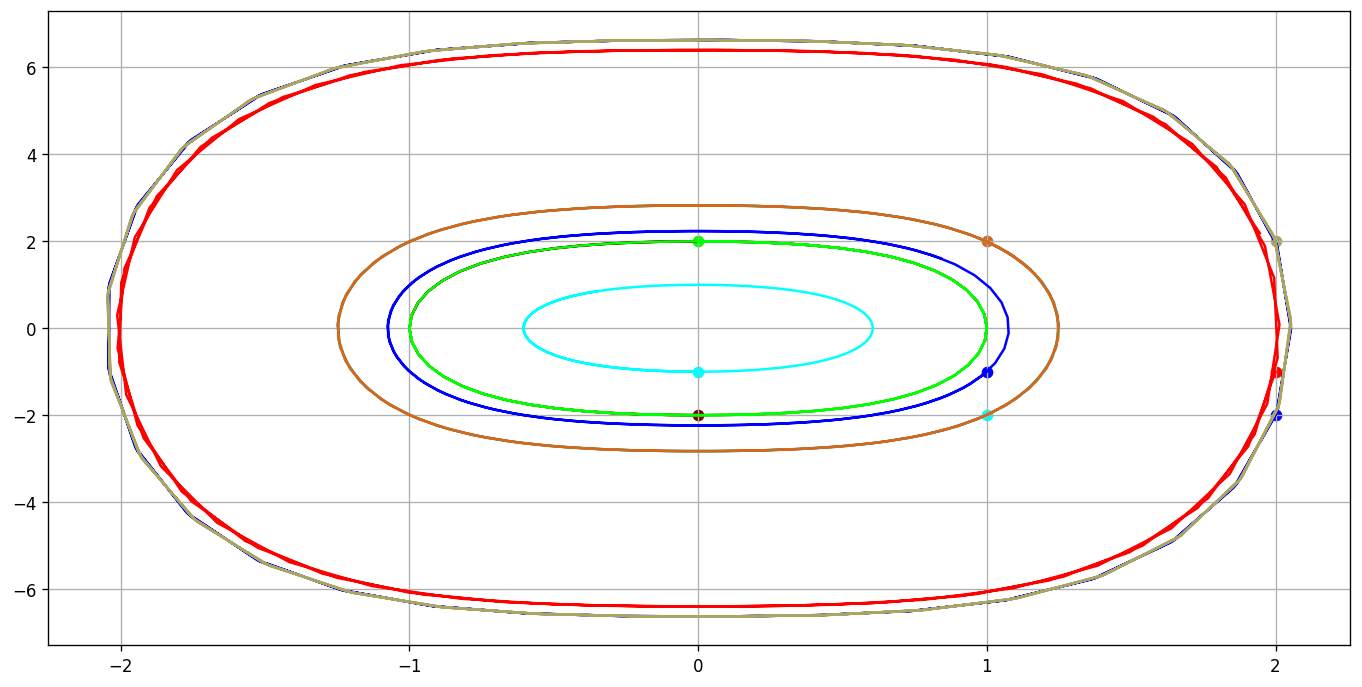

In [ ]:
def f(y, t, epsilon = 1):
    y1, y2 = y
    y1t = y2
    y2t = -4 * y1 ** 3 -2 * epsilon * y1
    return [y1t, y2t]

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

time = np.linspace(0, 5, 100)
grid = mesh([0, 1, 2], [-1, -2, 2])
grid_p = mesh(grid, [1])

for i in grid_p:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y1 = w[:, 0]
    y2 = w[:, 1]
    plt.plot(y1, y2, c = colors[i[0][0]+i[0][1]+i[1]], label = "x(time)")
    plt.scatter(y1[0], y2[0], c = colors[i[1]+i[0][1]+i[0][0]])
    
plt.grid(True)  
plt.show() 

Тип бифуркаци:
циклы, от точки типа центр

###6.
$
\left\{
\begin{array}{cc}
\overset{\cdot}{x} = εx_1 \\
\overset{\cdot \cdot}{x} = -x_2 \\
\end{array}
\right.
$

Собственные значения:   
$λ_1​=ε \\
λ_2​=−1​$​
* если $λ​ < 0$, то устойчивый узел;
* если $λ < 0$, то неустойчивое седло​.

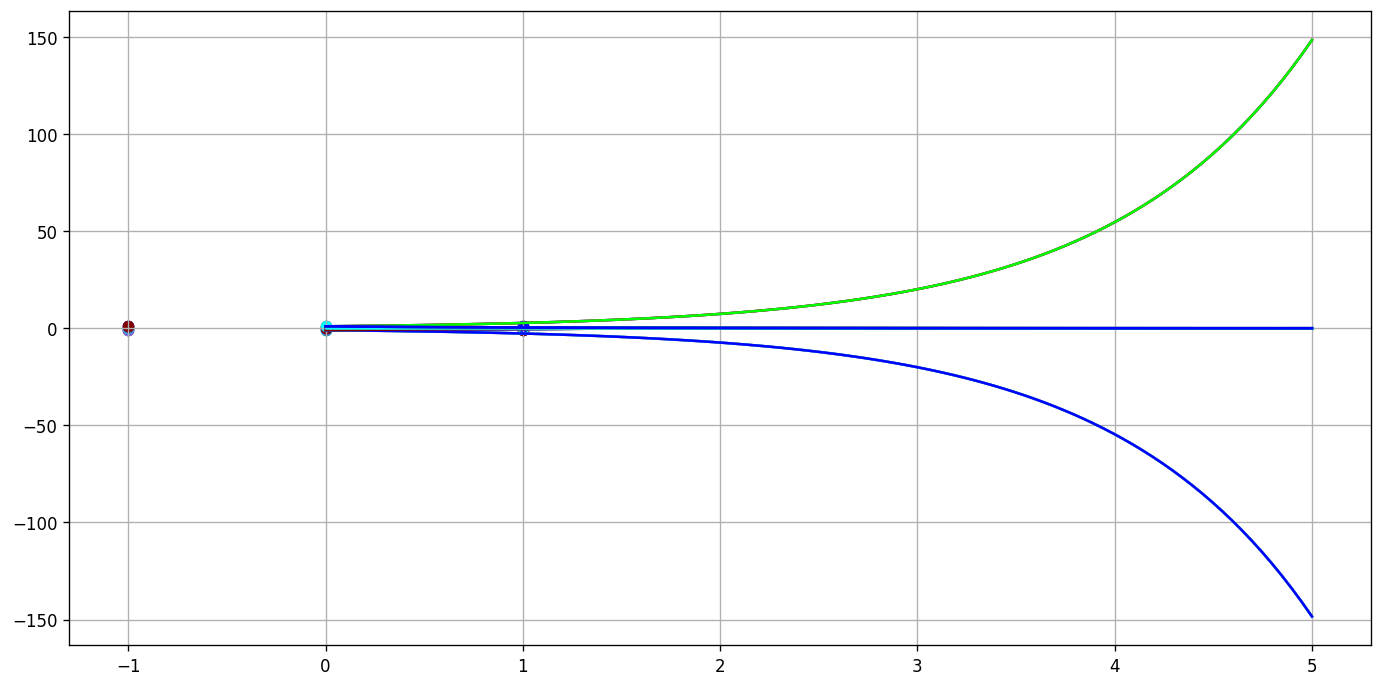

In [ ]:
def f(y, t, epsilon = 1):
    y1, y2 = y
    y1t = epsilon * y1
    y2t = -y2
    return [y1t, y2t]

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

time = np.linspace(0, 5, 100)
grid = mesh([-1, 0, 1], [-1, 0, 1])
grid_p = mesh(grid, [1, -1])

for i in grid_p:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y1 = w[:, 0]
    y2 = w[:, 1]
    plt.plot(time, y2, c = colors[i[1]+i[0][1]+i[0][0]], label = "x(time)")
    plt.plot(time, y1, c = colors[i[1]+i[0][1]+i[0][0]], label = "x(time)")
    plt.scatter(y1[0], y2[0], c = colors[i[1]+i[0][1]+i[0][0]])
    
plt.grid(True)  
plt.show() 

###7.
$
\left\{
\begin{array}{cc}
\overset{\cdot}{x} = εx-y-x \cdot (x^2 + y^2) \\
\overset{\cdot}{y} = x+ ε y-y \cdot (x^2 + y^2) \\
\end{array}
\right.
$
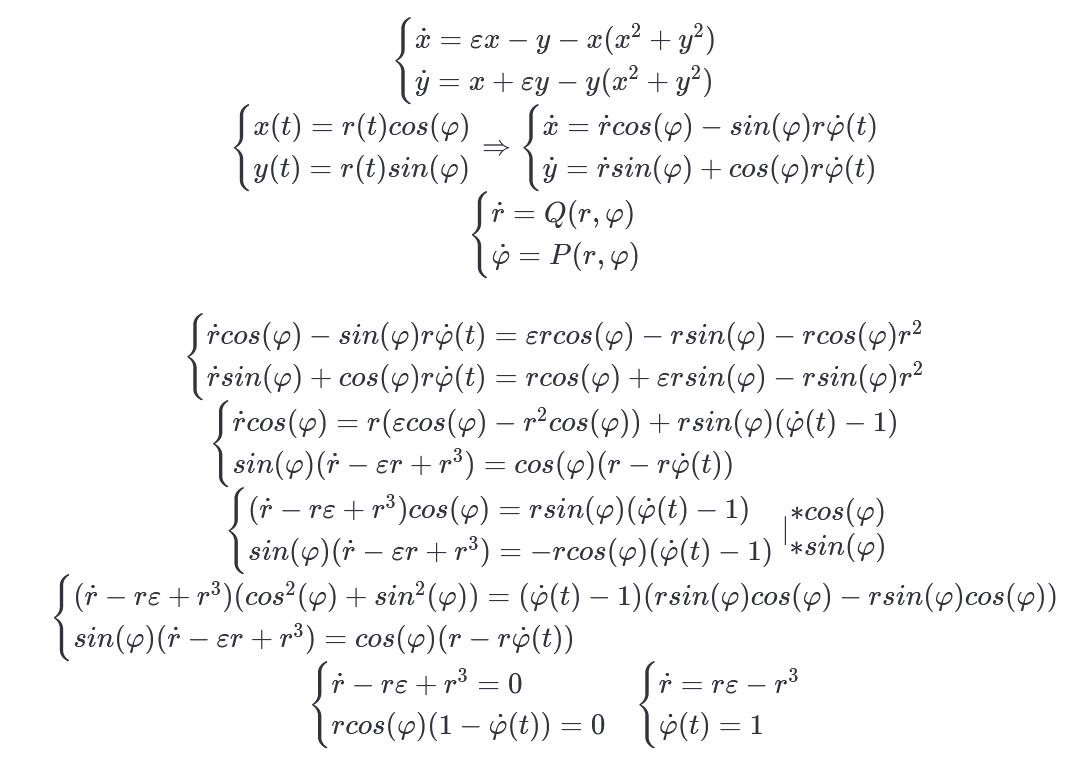

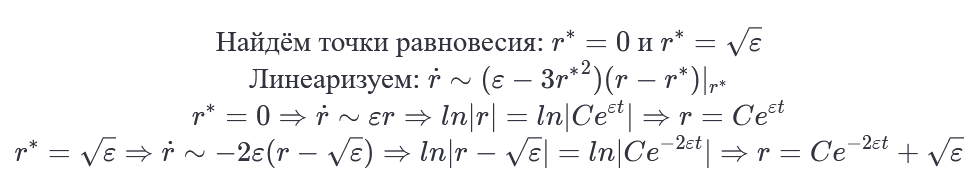

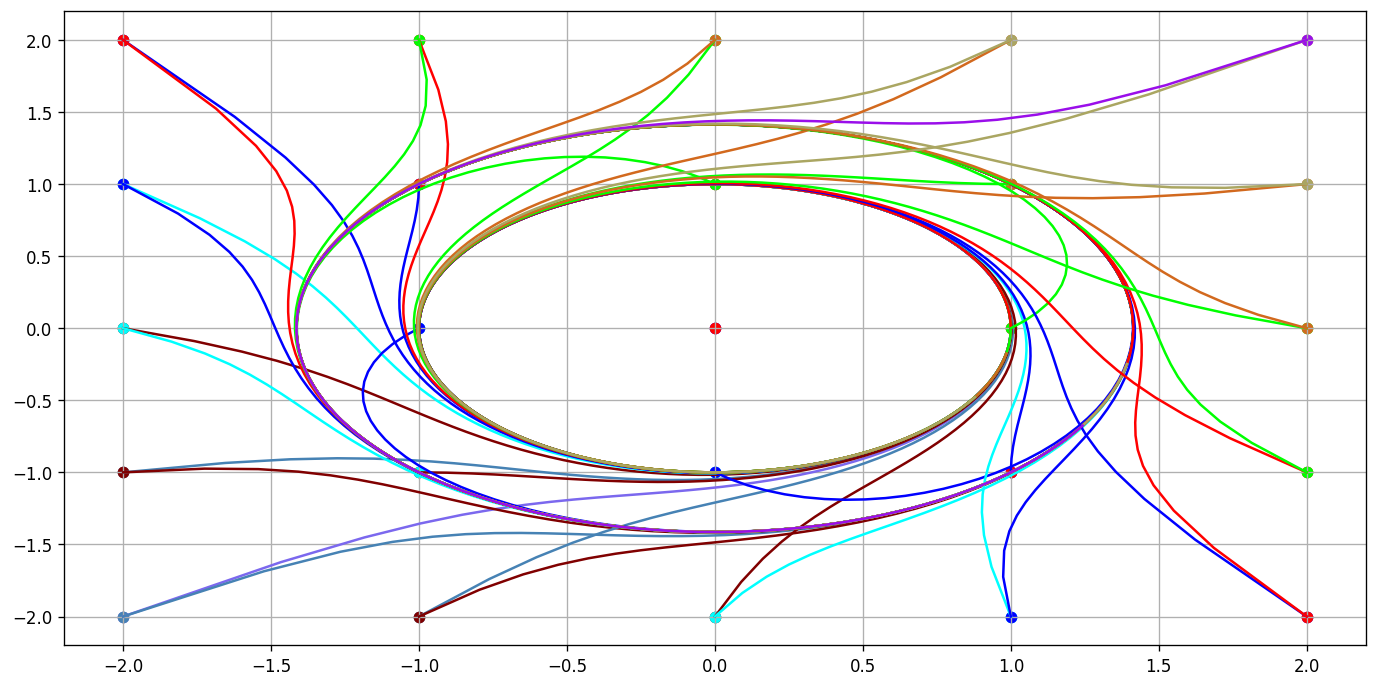

In [ ]:
def f(y, t, epsilon = 1):
    y1, y2 = y
    y1t = epsilon * y1 - y2 - y1 * (y2 ** 2 + y1 ** 2)
    y2t = epsilon * y2 + y1 - y2 * (y2 ** 2 + y1 ** 2)
    return [y1t, y2t]

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

time = np.linspace(0, 5, 100)
grid = mesh([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])
grid_p = mesh(grid, [1, 2])

for i in grid_p:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y1 = w[:, 0]
    y2 = w[:, 1]
    plt.plot(y1, y2, c = colors[i[1]+i[0][1]+i[0][0]], label = "x(time)")
    plt.scatter(y1[0], y2[0], c = colors[i[1]+i[0][1]+i[0][0]])
    
plt.grid(True)  
plt.show() 

Тип бифуркации:     
Андронова-Хопфа

###8.
Оптимизационная модель рыболовства (мягкая, с c = kx):

$$
\overset{\cdot}{x}=- ε ^2 sin(x)
$$

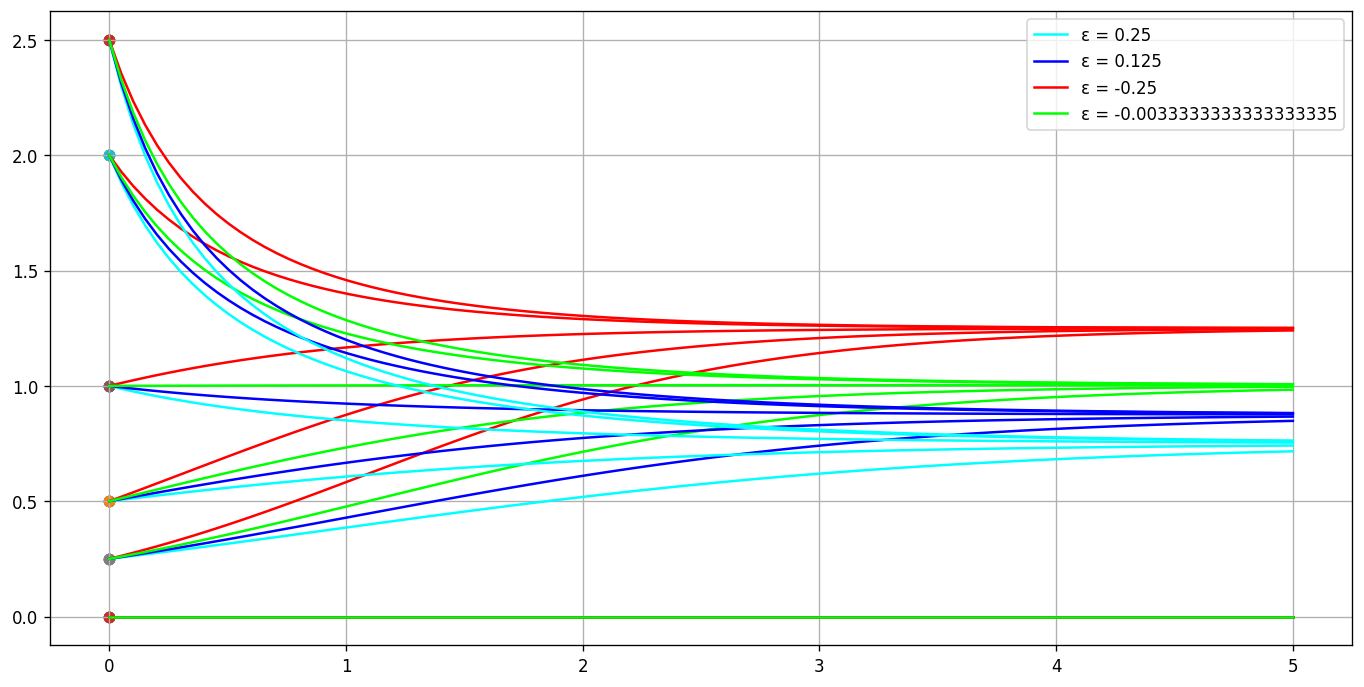

In [8]:
def f(y, t, epsilon = 1):
    y1 = y - y ** 2 - epsilon * y
    return [y1[0]]

fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)

time = np.linspace(0, 5, 100)
epsilon = [1/4, 1/8, -1/4, -1/300]
grid = mesh([0, 0.25, 0.5, 1, 2, 2.5], epsilon)

for i in grid:
    w = integr.odeint(f,                   
                  i[0],           
                  time,         
                  (i[1], )         
                  )

    y = w[:, 0]
    plt.plot(time, y, c=colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
    
plt.grid(True)  
plt.show() 

c = const

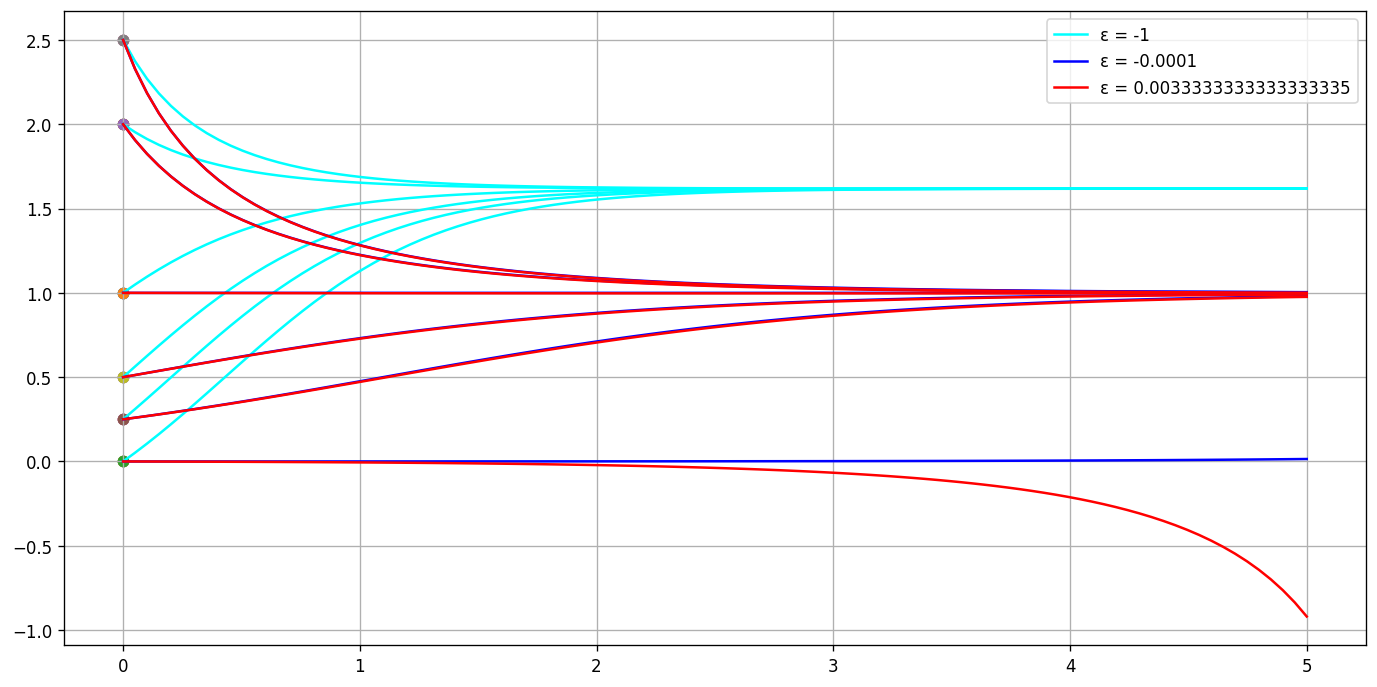

In [7]:
def f(y, t, epsilon = 1/4):
    y1 = y - y ** 2 - epsilon
    return [y1[0]]

time = np.linspace(0, 5, 100)
fig = plt.figure(facecolor='white', figsize = dynamics_pics, dpi=stat_dpi)
epsilon = [-1, -0.0001, 1/300]
grid = mesh([0, 0.25, 0.5, 1, 2, 2.5], epsilon)

for i in grid:
    w = integr.odeint(f,
                  i[0],
                  time,
                  (i[1], )
                  )

    y = w[:, 0]
    plt.plot(time, y, c=colors[epsilon.index(i[1])], label=f'ε = {i[1]}')
    plt.scatter(0, i[0])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid(True)
plt.show() 